# Real Generation Graphics

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Date : 01-03-2022 

In [135]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_func = '../../Functions/'

# functions AND system photovoltaic
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_func)

import functions as func
import imp
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook

import bokeh as boken
from bokeh.plotting import figure, output_file, show
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums


## 1) Data_real

In [ ]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

ERROR1: pickle NOT found in path: ../../Data/Real_Generations_Data/Real_Generations.pickle
- Tried to read file: ../../Data/Real_Generations_Data/Real_Generations.xlsx


In [120]:
#data_pickle

## 2) Graph_per_hour

In [121]:
# names to seach
names_pv = ['PMGD PFV EL GUANACO SOLAR',
            'PMGD PFV PUENTE SOLAR',
            'PMGD PFV CITRINO']

In [122]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      first_year=2021,
                                      last_year=2021,
                                      names_pv=names_pv,
                                      months=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      p = False)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 



<IPython.core.display.Javascript object>


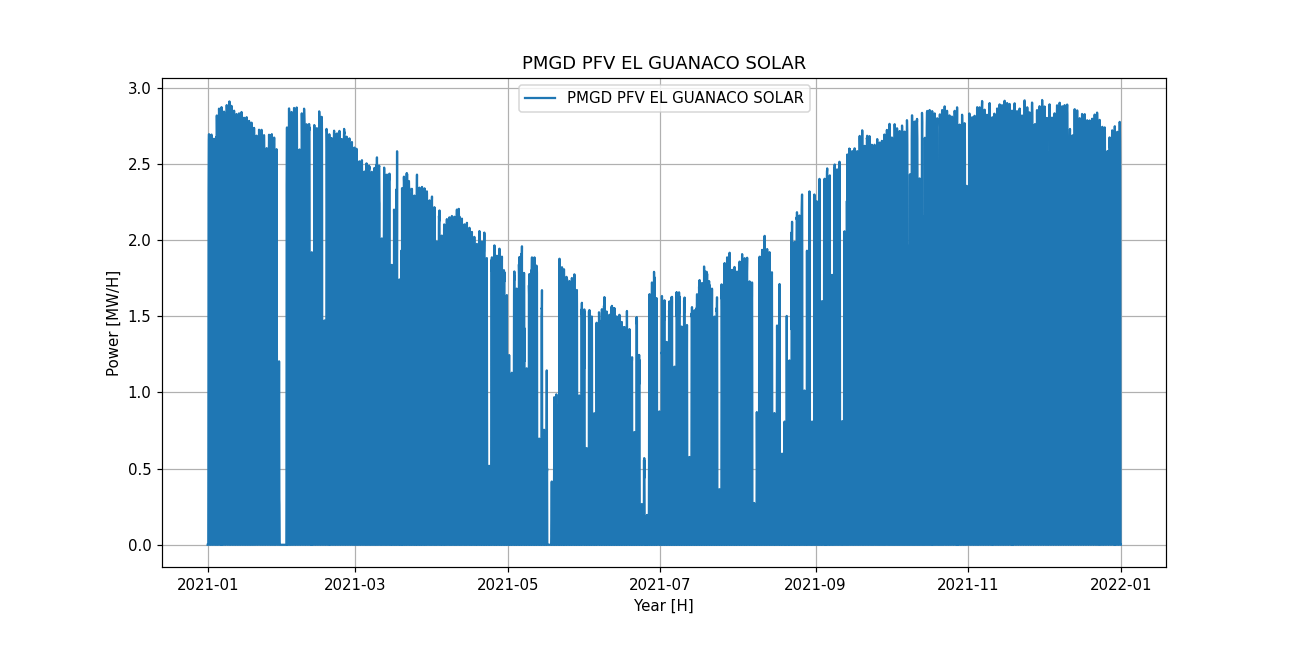

PMGD PFV EL GUANACO SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


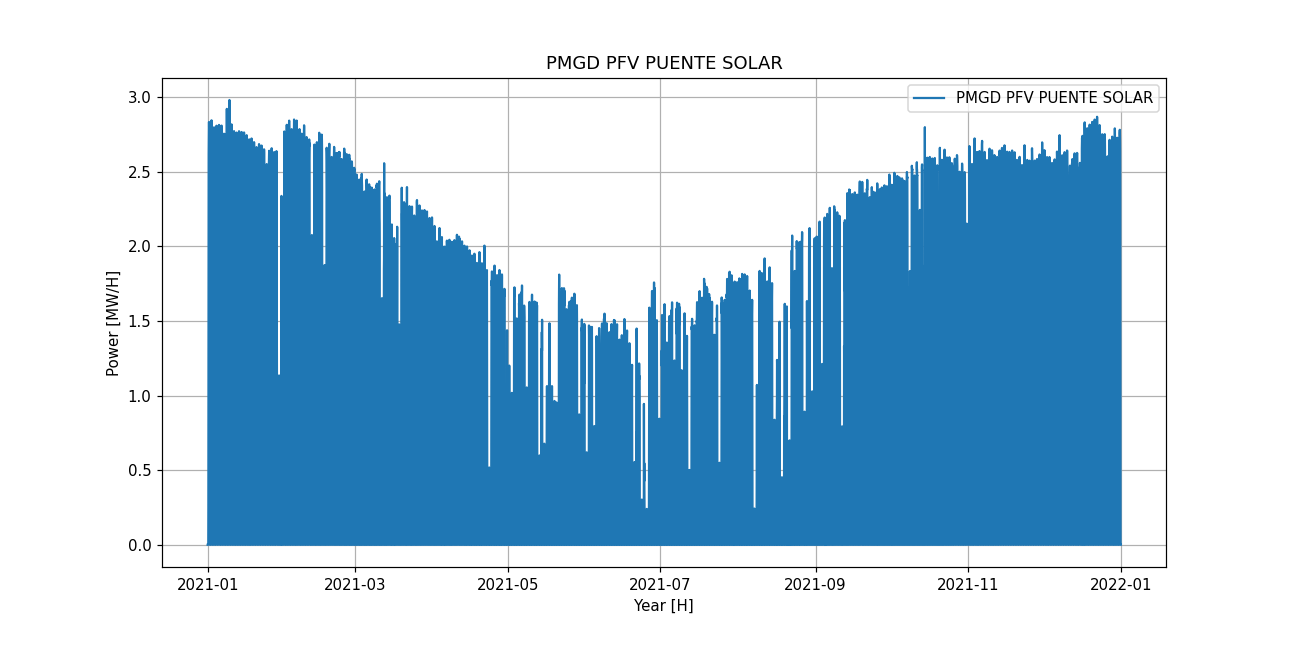

PMGD PFV PUENTE SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


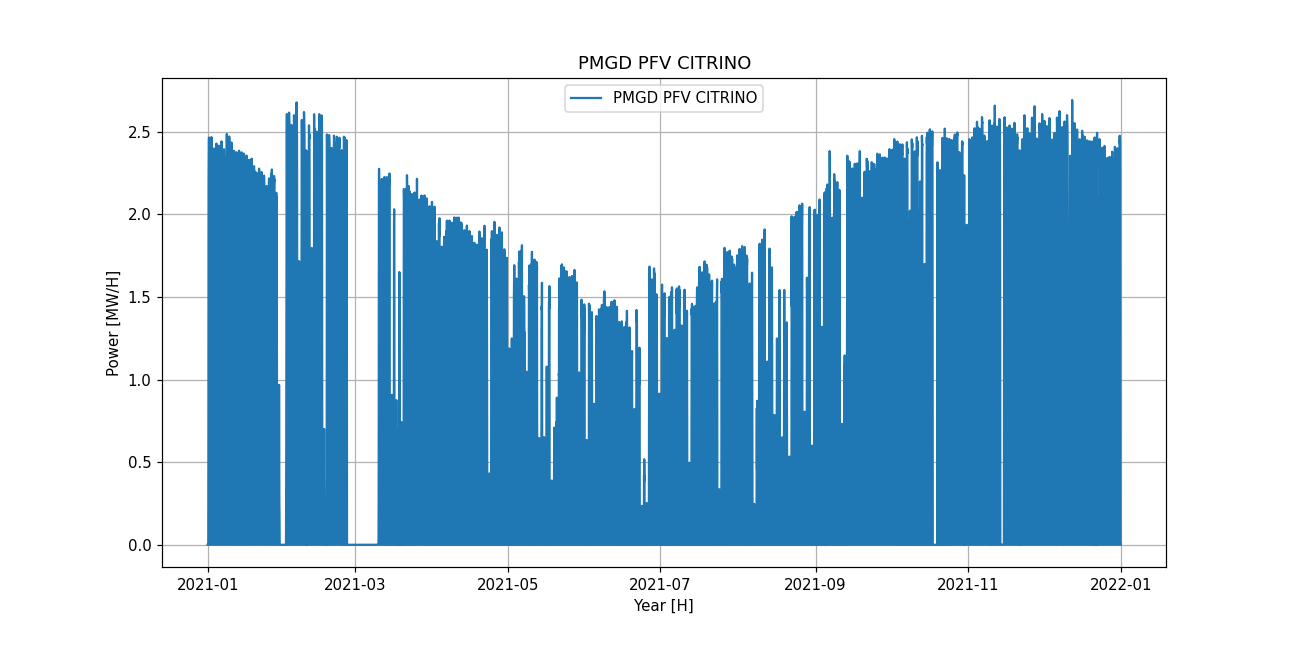

PMGD PFV CITRINO len: 8760
x 8760
y 8760


In [123]:
func.graph(data=data_hours,
           x_label= 'Year [H]',
           y_label='Power [MW/H]',
           name='hour')

In [130]:
def multi_graph(data=None,x_label= 'Year [ ]',y_label='Power [MW/ ]',name=None):
    if not isinstance(data, dict):
        print('ERROR1: Data is not a',dict)
        print('        It is type:',str(type(data)))
        return
    
    if name == None:
        print('ERROR2: Name not defined')
        return
    n = []
    for ppvv in data:
        n.append(ppvv)
    print(n)
    x = pd.Series(data=data[n[0]]).index
    pv_series1 = pd.Series(data=data[n[0]]).values
    pv_series2 = pd.Series(data=data[n[1]]).values
    pv_series3 = pd.Series(data=data[n[2]]).values
    plt.figure(figsize=(12,6))
    p1,p2,p3 = plt.plot(x,pv_series1,x, pv_series2,x, pv_series3)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend([n[0],n[1],n[2]])
    plt.grid()
    plt.title('comparación radar Padre Hurtado')
    plt.savefig(name+'.png',dpi=400)
    plt.show()
    


['PMGD PFV EL GUANACO SOLAR', 'PMGD PFV PUENTE SOLAR', 'PMGD PFV CITRINO']


<IPython.core.display.Javascript object>


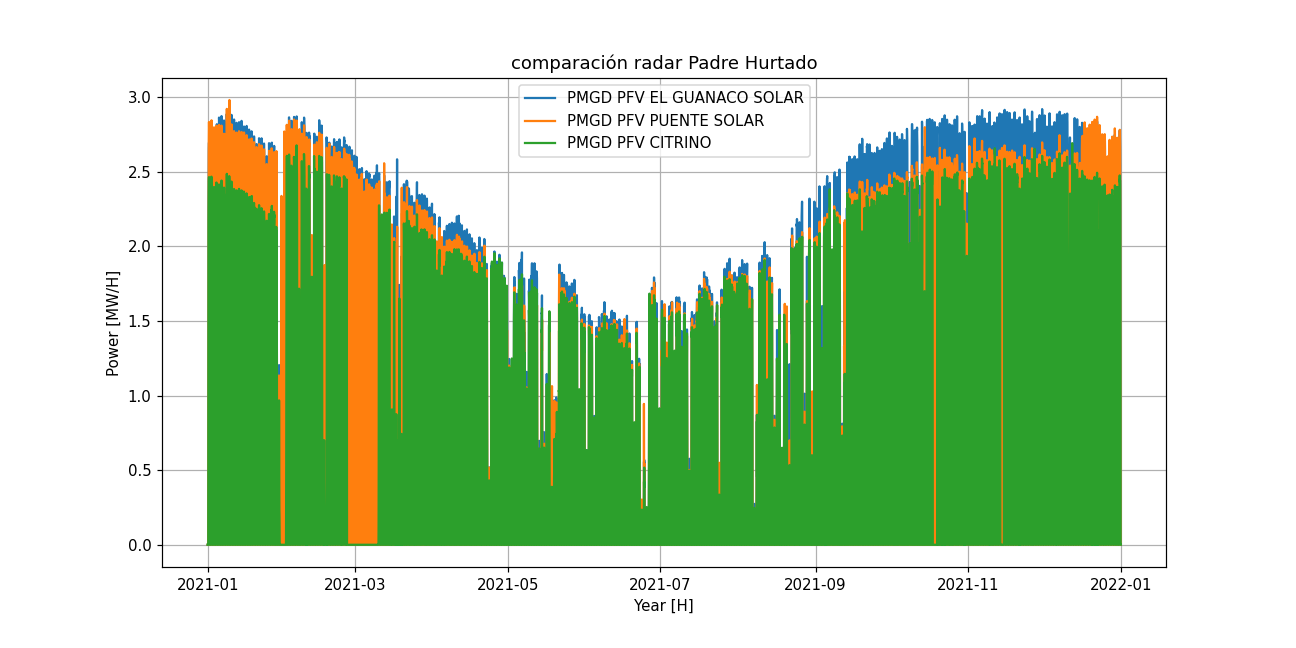

In [131]:
multi_graph(data=data_hours,
           x_label= 'Year [H]',
           y_label='Power [MW/H]',
           name='comparación_por_hora')

## 3) Graph_per_day

In [132]:
# find daily logs for each name
data_days = func.filter_day_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      first_year=2021,
                                      last_year=2021,
                                      names_pv=names_pv,
                                      months=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 



<IPython.core.display.Javascript object>


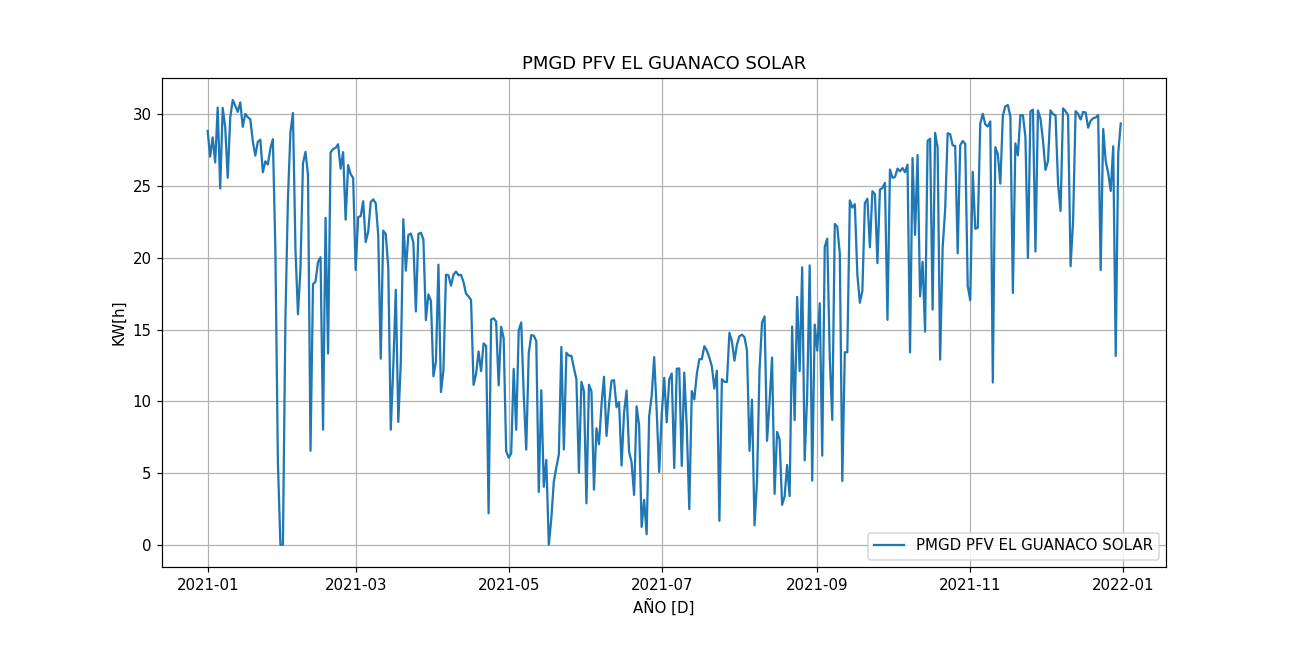

PMGD PFV EL GUANACO SOLAR len: 365
x 365
y 365


<IPython.core.display.Javascript object>


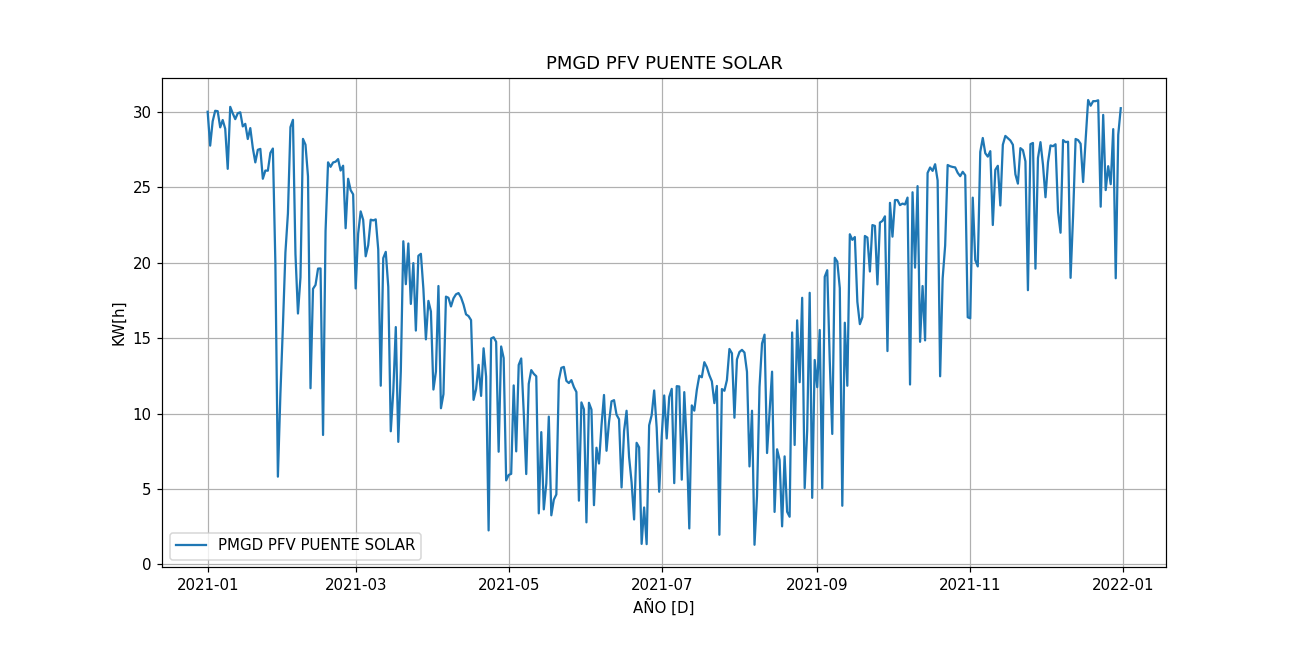

PMGD PFV PUENTE SOLAR len: 365
x 365
y 365


<IPython.core.display.Javascript object>


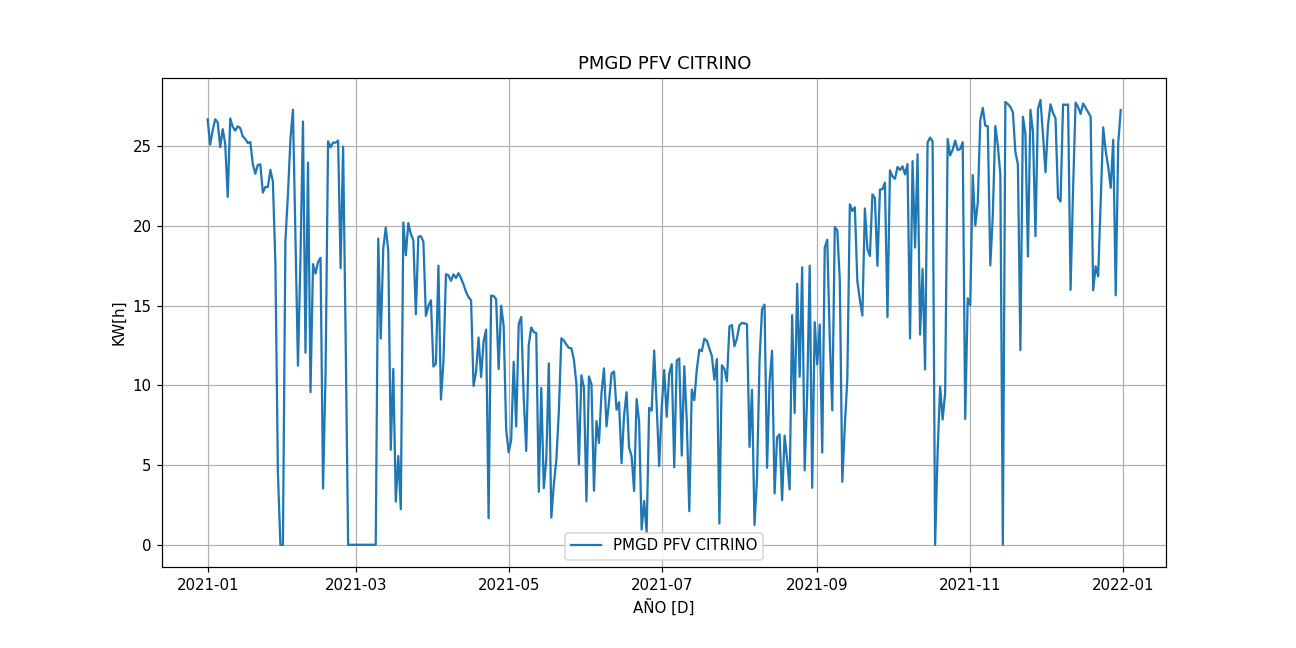

PMGD PFV CITRINO len: 365
x 365
y 365


In [133]:
func.graph(data=data_days,
           x_label= 'AÑO [D]',
           y_label='KW[h]',
           name='days')

['PMGD PFV EL GUANACO SOLAR', 'PMGD PFV PUENTE SOLAR', 'PMGD PFV CITRINO']


<IPython.core.display.Javascript object>


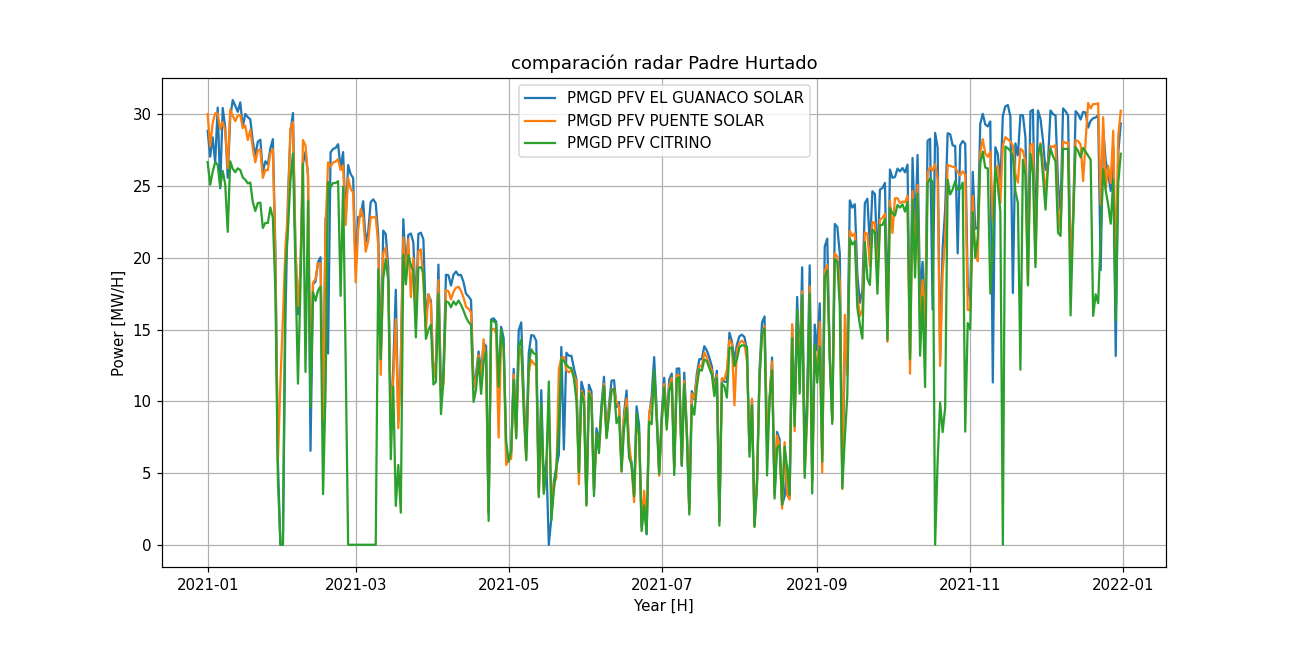

In [134]:
multi_graph(data=data_days,
           x_label= 'Year [H]',
           y_label='Power [MW/H]',
           name='comparacion_por_dias')

## 4) Graph_per_month

In [22]:
# find daily logs for each name
data_months = func.filter_month_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



<IPython.core.display.Javascript object>


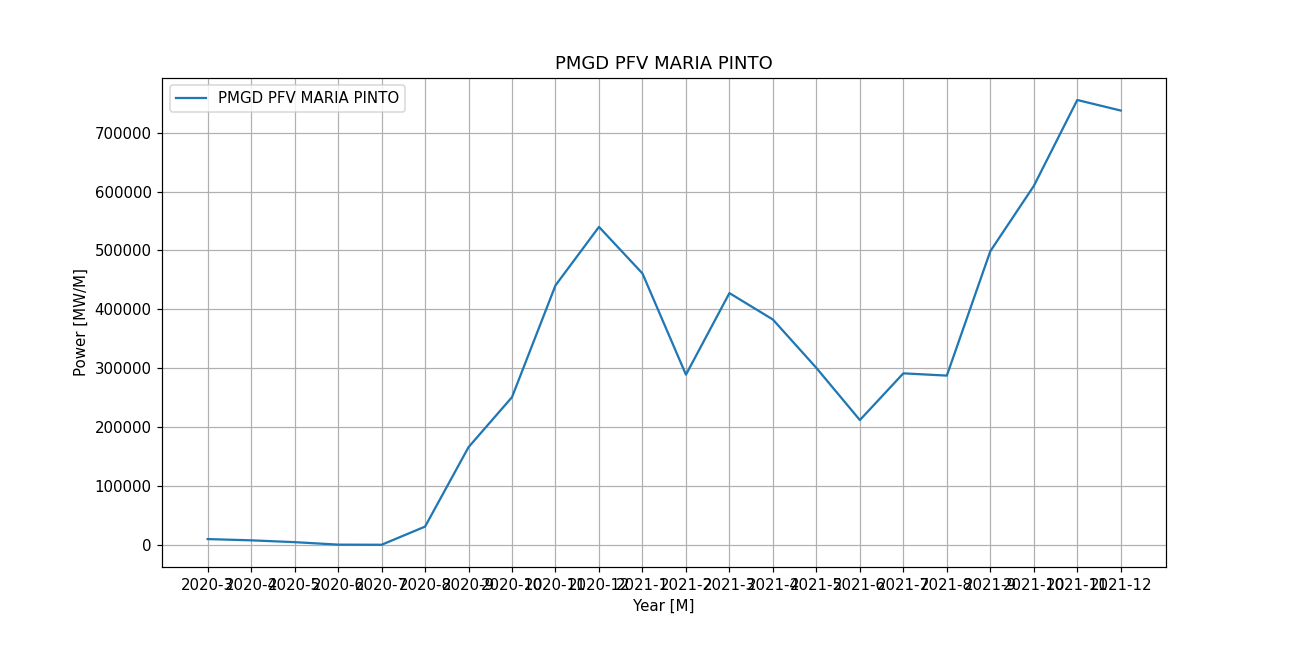

PMGD PFV MARIA PINTO len: 22
x 22
y 22


In [23]:
func.graph(data=data_months,
           x_label= 'Year [M]',
           y_label='Power [MW/M]',
           name='month')

             Fecha      Total
582116  2021-01-01  87.108629
582117  2021-01-02  83.314322
582118  2021-01-03  88.299461
582119  2021-01-04  84.472444
582120  2021-01-05  88.456671
...            ...        ...
745366  2021-12-27  53.263880
745367  2021-12-28  15.118884
745368  2021-12-29  77.639687
745369  2021-12-30  76.836727
745370  2021-12-31  80.745065

[365 rows x 2 columns]


<IPython.core.display.Javascript object>


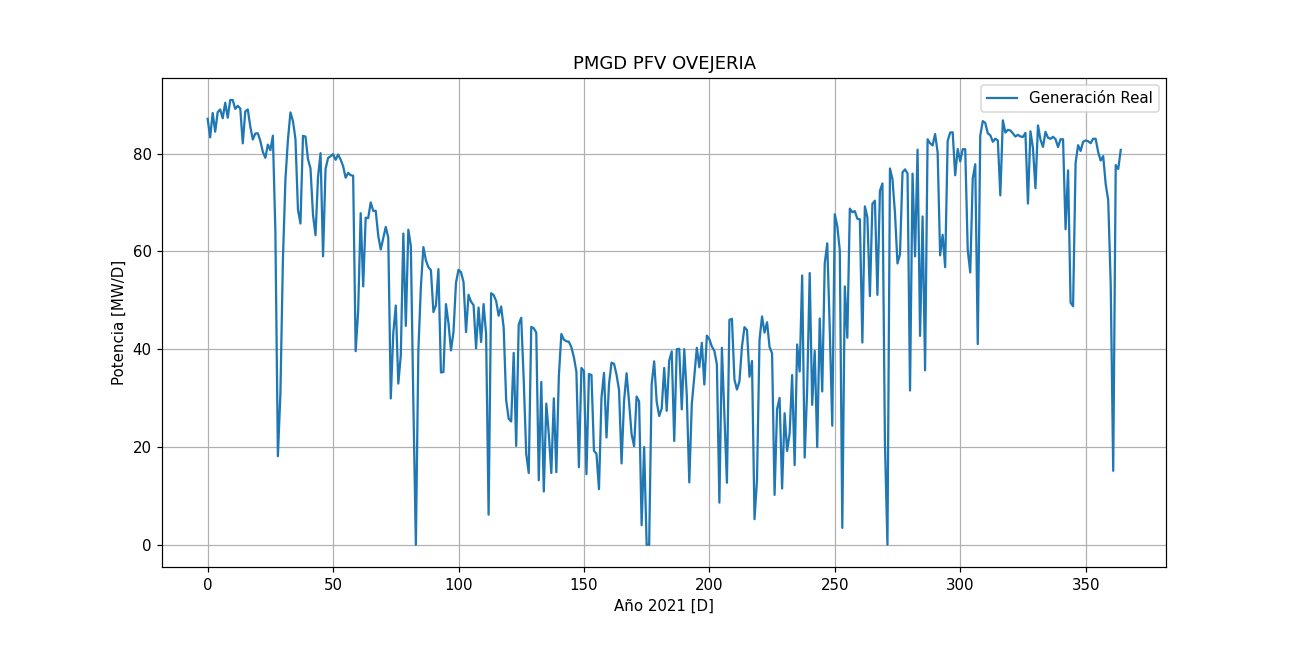

In [10]:
# names for photovoltaics systems
#name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
name_pv = ['PMGD PFV OVEJERIA']
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv[0]]
dic_data_sub = {}
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data

        
print(dic_data_sub[name_pv[0]])

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(12,6))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png',dpi=400)
    plt.show()
    
    
    source = dic_data_sub #bkmdl.ColumnDataSource(dict_source)
    
    p = figure(x_axis_label='x',
                               y_axis_label = 'y',
                               #x_axis_type= 'datetime',
                               plot_height = 600, 
                               plot_width=1200,
                               #tools="pan,reset,save",
                               title = 't')
    p.line(x=range(len(filter_data)),y=filter_data['Total'], line_width = 2 )
    #p.yaxis.formatter = boken.models.BasicTickFormatter(use_scientific = True)

    #p.source(x=range(len(filter_data)),y=filter_data['Total'])
    output_file(i+'.html')
    show(p)


In [ ]:
# names for photovoltaics systems
#name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
name_pv = ['PMGD PFV ALTOS DE TILTIL']
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv[0]]
dic_data_sub = {}
year = 2019
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data

year = 2020
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = dic_data_sub[i].append(filter_data)
    
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = dic_data_sub[i].append(filter_data)

        
print(dic_data_sub[name_pv[0]])

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(12,6))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png',dpi=400)
    plt.show()
    
    
    source = dic_data_sub #bkmdl.ColumnDataSource(dict_source)
    
    p = figure(x_axis_label='x',
                               y_axis_label = 'y',
                               #x_axis_type= 'datetime',
                               plot_height = 600, 
                               plot_width=1200,
                               #tools="pan,reset,save",
                               title = 't')
    p.line(x=range(len(filter_data)),y=filter_data['Total'], line_width = 2 )
    #p.yaxis.formatter = boken.models.BasicTickFormatter(use_scientific = True)

    #p.source(x=range(len(filter_data)),y=filter_data['Total'])
    output_file(i+'.html')
    show(p)


In [ ]:
source

In [ ]:
# names for photovoltaics systems
#name_pv = ['PMGD PFV VALLE DE LA LUNA II','PMGD PFV MARCHIGUE II','PMGD PFV CABILSOL','PMGD PFV PILPILEN','PMGD PFV EL GUANACO SOLAR']
name_pv = ['PMGD PFV LINGUE']
data_sub = data_pickle.loc[data_pickle['Central'] == name_pv[0]]
dic_data_sub = {}
year = 2021
for i in name_pv:
    filter_data = data_pickle[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[data_pickle['Central'] == i]
    filter_data = filter_data.loc[filter_data['año'] == year]
    filter_data = filter_data[['Fecha','Total']]
    dic_data_sub[i] = filter_data

        
print(dic_data_sub[name_pv[0]])

for i in dic_data_sub:
    filter_data = dic_data_sub[i]
    plt.figure(figsize=(12,6))
    plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Real')
    #plt.plot(range(len(filter_data)),filter_data['Total'],label='Generación Pred')
    plt.xlabel('Año '+str(year)+' [D]')
    plt.ylabel('Potencia [MW/D]')
    plt.legend()
    plt.grid()
    plt.title(i)
    plt.savefig(i+'.png',dpi=400)
    plt.show()
    
    
    source = dic_data_sub #bkmdl.ColumnDataSource(dict_source)
    
    p = boken.plotting.figure(x_axis_label='x',
                               y_axis_label = 'y',
                               #x_axis_type= 'datetime',
                               plot_height = 600, 
                               plot_width=1200,
                               #tools="pan,reset,save",
                               title = 't')
    p.line(x=range(len(filter_data)),y=filter_data['Total'], line_width = 2 )
    #p.yaxis.formatter = boken.models.BasicTickFormatter(use_scientific = True)

    #p.source(x=range(len(filter_data)),y=filter_data['Total'])
    output_file(i+'.html')
    show(p)
